In [1]:
# Import the required libraries and dependencies
import os
import requests
import json
import numpy as ny
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import matplotlib.pyplot as plt

In [16]:
#Pull the .env file into the current directory
load_dotenv()

Python-dotenv could not parse statement starting at line 1


True

## Set up the example

In [5]:
# The monthly amount for the member's household income
monthly_income = 12000

In [6]:
# Set the current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

## Part 1: Evaluate the Cryptocurrency Wallet by Using the Requests Library

#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [7]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC)by using the API endpoints that the starter code supplied.

In [8]:
# Using the Python requests library, make an API call to access the current price of BTC
btc_response = requests.get(btc_url).json()

# Use the json.dumps function to review response data 
# Set the indent and sort_keys parameters to make the response object readable
print(json.dumps(btc_response, indent=3, sort_keys=True))

{
   "data": {
      "1": {
         "circulating_supply": 18873175,
         "id": 1,
         "last_updated": 1636913055,
         "max_supply": 21000000,
         "name": "Bitcoin",
         "quotes": {
            "USD": {
               "market_cap": 1216135049273,
               "percent_change_1h": 0.97711939939849,
               "percent_change_24h": -0.413355544809254,
               "percent_change_7d": 4.67378253856206,
               "percentage_change_1h": 0.97711939939849,
               "percentage_change_24h": -0.413355544809254,
               "percentage_change_7d": 4.67378253856206,
               "price": 64543.0,
               "volume_24h": 25741249452
            }
         },
         "rank": 1,
         "symbol": "BTC",
         "total_supply": 18873175,
         "website_slug": "bitcoin"
      }
   },
   "metadata": {
      "error": null,
      "num_cryptocurrencies": 3105,
      "timestamp": 1636913055
   }
}


#### Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [9]:
# Navigate the BTC response object to access the current price of BTC
btc_price = btc_response["data"]['1']['quotes']['USD']["price"]

# Print the current price of BTC
btc_price

64543.0

#### Repeat for ETH

In [10]:
# Using the Python requests library, make an API call to access the current price ETH
eth_response = requests.get(eth_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(eth_response, indent=3, sort_keys=True))

{
   "data": {
      "1027": {
         "circulating_supply": 118341071,
         "id": 1027,
         "last_updated": 1636913062,
         "max_supply": 0,
         "name": "Ethereum",
         "quotes": {
            "USD": {
               "market_cap": 542815608801,
               "percent_change_1h": 0.71521086914067,
               "percent_change_24h": -2.33474292702838,
               "percent_change_7d": 1.28054044435339,
               "percentage_change_1h": 0.71521086914067,
               "percentage_change_24h": -2.33474292702838,
               "percentage_change_7d": 1.28054044435339,
               "price": 4585.08,
               "volume_24h": 12965574447
            }
         },
         "rank": 2,
         "symbol": "ETH",
         "total_supply": 118341071,
         "website_slug": "ethereum"
      }
   },
   "metadata": {
      "error": null,
      "num_cryptocurrencies": 3105,
      "timestamp": 1636913062
   }
}


In [11]:
# Navigate the ETH response object to access the current price of ETH
eth_price = eth_response['data']['1027']['quotes']['USD']['price']

# Print the current price of ETH
eth_price

4585.08

### Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [12]:
# Build a Series to hold our BTC and ETH values
btc_value=pd.Series(data=[btc_coins, btc_price, (btc_coins*btc_price)], index= ['coins', 'curr_mkt_price', 'total value'])
type(btc_value)

pandas.core.series.Series

In [13]:
# Compute the current value of the BTC holding 
eth_value=pd.Series(data=[eth_coins, eth_price, (eth_coins*eth_price)], index= ['coins', 'curr_mkt_price', 'total value'])
eth_value

coins                 5.300
curr_mkt_price     4585.080
total value       24300.924
dtype: float64

In [14]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding
crypto_value= pd.concat([btc_value , eth_value],axis=1)

# Print current cryptocurrency wallet balance
crypto_value= crypto_value.rename(columns={0:'btc',1:'eth'})
crypto_value=crypto_value.transpose()
crypto_value

,coins,curr_mkt_price,total value
btc,1.2,64543.00,77451.600
eth,5.3,4585.08,24300.924


In [15]:
total_crypto_wallet=crypto_value['total value'].sum()
total_crypto_wallet

101752.52399999999

### Part 2: Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

#### Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

#### Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in both (SPY) and (AGG).

In [17]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200

#### Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [18]:
# Set the variables for the Alpaca API and secret keys
alpaca_key=os.getenv('alpaca_key')
alpaca_secret_key=os.getenv('alpaca_secret_key')

# Create the Alpaca tradeapi.REST object. Pass in as parameters the API key, secret key, and version number.
alpaca = tradeapi.REST(
alpaca_key,
alpaca_secret_key,
api_version='v2')

#### Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This isto get the one closing price for the most-recent trading day.


In [19]:
# Set the tickers for both the bond and stock portion of the portfolio
tickers= ["SPY","AGG"]

# Set timeframe to 1D 
timeframe="1D"

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday to provide the closing price of the previous trading day
start_date=pd.Timestamp("2021-11-12",tz="America/New_York").isoformat()
end_date=pd.Timestamp("2021-11-12",tz="America/New_York").isoformat()

#### Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_barset` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_barset` function.

In [22]:
# Use the Alpaca get_barset function to get closing prices the portfolio. don't forget to add '.df' at the end.
df_portfolio=alpaca.get_barset(
tickers,
timeframe,
start=start_date,
end=end_date,
).df

# Review the Alpaca DataFrame
df_portfolio.head()

AGG                                       SPY  \
                            open     high     low   close   volume    open   
time                                                                         
2021-11-12 00:00:00-05:00  114.5  114.585  114.26  114.33  4398727  465.12   

                                                             
                             high     low   close    volume  
time                                                         
2021-11-12 00:00:00-05:00  467.86  464.11  467.26  44677612

#### Navigating the Alpaca response DataFrame and select the `SPY` and `AGG` closing prices.

In [23]:
#Create an empty DataFrame for closing prices
closing_prices_df = pd.DataFrame()

# Get the closing prices of AGG and SPY
closing_prices_df['AGG'] = df_portfolio["AGG"]['close']
closing_prices_df['SPY'] = df_portfolio["SPY"]['close']

# Drop the time component of the date
closing_prices_df.index = closing_prices_df.index.date

# Check your work
closing_prices_df.head()

,AGG,SPY
2021-11-12,114.33,467.26


#### Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [80]:
### Add the number of shares variable to the data frame
### Calculate the total value of each position in the DataFrame
new_sb_closing_prices_df=closing_prices_df.transpose()
new_sb_closing_prices_df['shares']=[agg_shares,spy_shares]
new_sb_closing_prices_df.columns=['mkt price', 'shares']
new_sb_closing_prices_df.head()

,mkt price,shares
AGG,114.33,200
SPY,467.26,110


In [82]:
# Calculate the current value of the stock portion of the portfolio
new_sb_closing_prices_df['total value']=new_sb_closing_prices_df['mkt price']*new_sb_closing_prices_df['shares']
new_sb_closing_prices_df

,mkt price,shares,total value
AGG,114.33,200,22866.0
SPY,467.26,110,51398.6


In [26]:
# Calculate the total value of the stock and bond portion of the portfolio
stocks_bonds_value= new_closing_prices_df['total value'].sum()

# Print the current balance of the stock and bond portion of the portfolio
stocks_bonds_value

74264.6

In [27]:
# Remember the crypto_value
total_crypto_wallet

101752.52399999999

In [28]:
# Calculate the total value of the member's entire portfolio
portfolio=stocks_bonds_value+total_crypto_wallet
portfolio

176017.124

### Part 3: Evaluate the Emergency Fund

#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [83]:
# Consolidate financial assets data 
new_sb_closing_prices_df=new_sb_closing_prices_df.rename(columns={'shares':'units'})
new_sb_closing_prices_df=new_sb_closing_prices_df[['units','mkt price', 'total value']]
new_sb_closing_prices_df


,units,mkt price,total value
AGG,200,114.33,22866.0
SPY,110,467.26,51398.6


In [30]:
# Review the Python list savings_data
crypto_value=crypto_value.rename(columns={'coins':'units', 'curr_mkt_price':'mkt price'})
crypto_value

,units,mkt price,total value
btc,1.2,64543.00,77451.600
eth,5.3,4585.08,24300.924


In [31]:
# Take a look at your complete portfolio
total_portfolio=pd.concat([new_closing_prices_df, crypto_value])
total_portfolio

,units,mkt price,total value
AGG,200.0,114.33,22866.000
SPY,110.0,467.26,51398.600
btc,1.2,64543.00,77451.600
eth,5.3,4585.08,24300.924


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

<AxesSubplot:title={'center':'Members Total Portfolio'}, ylabel='total value'>

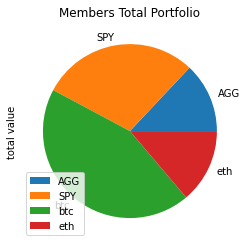

In [32]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
total_portfolio.plot(kind="pie", y='total value', title="Members Total Portfolio")

#### Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


##### Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [33]:
# Create a variable named emergency_fund_value
emergency_fund_value = monthly_income * 3
emergency_fund_value

36000

In [34]:
total_portfolio_value = total_portfolio['total value'].sum()
total_portfolio_value

176017.124

##### Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [44]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:
if total_portfolio_value > emergency_fund_value:
    print('Congratulations!')
elif total_portfolio_value==emergency_fund_value:  
    print('Great, you made it!')
else:
    print(f"you're this {emergency_fund_value-total_portfolio_value} far away")

Congratulations!


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation


#### Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [46]:
# Set start and end dates of 3 years back from your current date
end_date
new_start_date=pd.Timestamp("2018-11-12",tz="America/New_York").isoformat()


# Set number of rows to 1000 to retrieve the maximum amount of rows
limit_rows=1000

In [49]:
# Use the Alpaca get_barset function to make the API call to get the 3 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
# Remember to add the df property to the end of the call so the response is returned as a DataFrame
new_prices_df = alpaca.get_barset(
  tickers,
  timeframe,
  start=new_start_date,
  end=end_date,
  limit=limit_rows
).df


# Display both the first and last five rows of the DataFrame
new_prices_df

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2018-11-12 00:00:00-05:00  104.31  104.350  104.2500  104.310  2142786.0   
2018-11-13 00:00:00-05:00  104.30  104.370  104.2131  104.350  2772430.0   
2018-11-14 00:00:00-05:00  104.22  104.500  104.2000  104.360  3170153.0   
2018-11-15 00:00:00-05:00  104.48  104.510  104.3101  104.480  3694888.0   
2018-11-16 00:00:00-05:00  104.55  104.710  104.5100  104.655  3277200.0   
...                           ...      ...       ...      ...        ...   
2021-11-08 00:00:00-05:00  115.14  115.150  114.9500  115.010  4696293.0   
2021-11-09 00:00:00-05:00  115.38  115.500  115.2900  115.330  6955738.0   
2021-11-10 00:00:00-05:00  115.11  115.140  114.3950  114.510  8821475.0   
2021-11-11 00:00:00-05:00  114.51  114.570  114.3000  114.340  3105027.0   
2021-11-12 00:00:00-05:00  114.50  114.585  114.2600  114.330  4398727.0   

                              SPY                                        
                             open     high       low   close     volume  
time                                                                     
2018-11-12 00:00:00-05:00  277.15  277.460  271.9900  272.49   78678065  
2018-11-13 00:00:00-05:00  273.09  275.325  271.2500  272.06   78846402  
2018-11-14 00:00:00-05:00  274.16  274.610  268.4499  270.13  113944238  
2018-11-15 00:00:00-05:00  268.78  273.540  267.0102  273.07  118131123  
2018-11-16 00:00:00-05:00  271.79  276.000  271.2100  273.68  107341090  
...                           ...      ...       ...     ...        ...  
2021-11-08 00:00:00-05:00  469.70  470.230  468.2031  468.97   38945705  
2021-11-09 00:00:00-05:00  469.32  469.570  465.8800  467.38   47198095  
2021-11-10 00:00:00-05:00  465.58  467.380  462.0400  463.63   63500032  
2021-11-11 00:00:00-05:00  465.21  465.290  463.7500  463.81   31757893  
2021-11-12 00:00:00-05:00  465.12  467.860  464.1100  467.26   44677612  

[757 rows x 10 columns]

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [52]:
# Create an empty `closing_prices_df` DataFrame using Pandas
new_closing_prices_df = pd.DataFrame()

# Populate the `closing_prices_df` DataFrame by accessing the `close` column
# from the `prices_df` DataFrame for both KO and TSLA .
new_closing_prices_df["AGG"] = new_prices_df["AGG"]["close"]
new_closing_prices_df["SPY"] = new_prices_df["SPY"]["close"]

# Update the index for the `closing_prices_df` DataFrame
# to retain only the `date` component.
new_closing_prices_df.index = new_closing_prices_df.index.date

# Compute the `daily_returns_df` DataFrame by chaining
# the pct_change function with the dropna function.
new_daily_returns_df = new_closing_prices_df.pct_change().dropna()

# Display both the head and tail of the `daily_returns_df` DataFrame
display(new_daily_returns_df.head())
display(new_daily_returns_df.tail())

,AGG,SPY
2018-11-13,0.000383,-0.001578
2018-11-14,0.000096,-0.007094
2018-11-15,0.001150,0.010884
2018-11-16,0.001675,0.002234
2018-11-19,0.000048,-0.016808


,AGG,SPY
2021-11-08,-0.001996,0.001025
2021-11-09,0.002782,-0.003390
2021-11-10,-0.007110,-0.008023
2021-11-11,-0.001485,0.000388
2021-11-12,-0.000087,0.007438


In [62]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.
MC_thirty_year = MCSimulation(
  portfolio_data = new_prices_df,
  weights = [.40,.60],
  num_simulation = 500,
  num_trading_days = 252*30
)

# Review the simulation input data
MC_thirty_year


In [63]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998170,1.009927,1.000578,0.986987,1.006733,1.000904,1.009546,0.996758,1.005298,1.012766,...,1.003089,0.992370,0.987429,1.003617,0.990638,1.000927,1.022047,1.004064,0.985753,1.005743
2,0.994073,1.005369,1.016528,0.978898,1.004332,0.993475,0.988736,1.009074,1.008062,1.022053,...,1.008818,1.004138,0.977309,0.986975,0.987746,0.998478,1.025661,1.009407,0.978701,1.014175
3,0.974691,1.003996,1.012680,0.988380,0.999066,0.975093,0.994660,1.004921,1.021438,1.033682,...,1.015131,1.015831,0.976998,0.988261,0.993540,1.004829,1.023345,1.021684,0.990644,1.020968
4,0.977136,1.003057,1.020311,0.975925,0.995295,0.997720,1.010164,0.993412,1.020752,1.056343,...,1.017544,1.008784,0.982402,0.993793,0.997055,1.003748,1.021075,1.006795,1.000460,1.020175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,40.753010,50.295963,12.531531,28.273106,19.334523,55.622018,4.159880,14.309895,13.698161,15.443933,...,63.072639,71.786742,62.319341,21.656688,50.485515,22.245663,166.963384,192.133018,33.424702,74.755542
7557,40.689208,50.309480,12.255475,28.166914,19.610268,56.009376,4.165484,14.699836,13.712215,15.517106,...,63.172247,72.777324,62.281012,21.753515,50.216740,22.192724,167.189427,193.483882,33.444255,74.515055
7558,40.588556,50.369105,12.220033,28.325125,19.530396,56.553295,4.151875,14.480776,13.760290,15.495345,...,63.117292,72.982485,62.157742,21.730677,50.388175,21.964441,166.861483,195.070094,33.398089,75.133095
7559,40.572959,49.734317,12.215366,28.109024,19.425967,56.580157,4.116821,14.482528,13.686025,15.441576,...,63.258334,72.584135,61.940617,21.803066,50.595708,22.067775,168.126960,195.184235,32.926871,75.068002


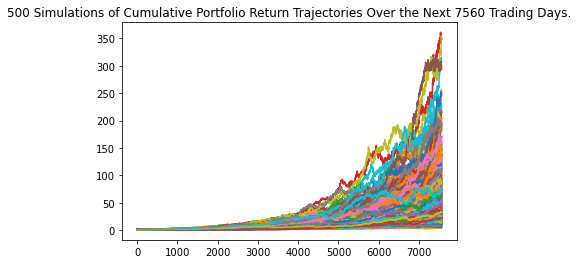

In [90]:
# Visualize the 30-year Monte Carlo simulation by creating an overlay line plot
MC_sim_line_plot = MC_thirty_year.plot_simulation()


#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

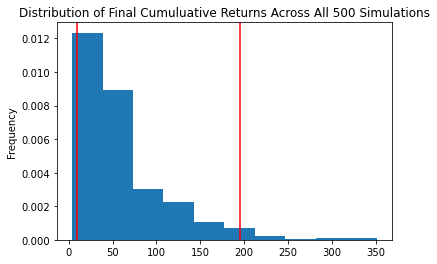

In [66]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation by plotting a histogram
MC_sim_dist_plot = MC_thirty_year.plot_distribution()


#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [67]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
MC_summary_statistics = MC_thirty_year.summarize_cumulative_return()

# Review the 30-year Monte Carlo summary statistics
MC_summary_statistics

count           500.000000
mean             60.685475
std              51.272110
min               4.042725
25%              27.246458
50%              44.063373
75%              75.311898
max             350.784289
95% CI Lower      9.056942
95% CI Upper    194.922540
Name: 7560, dtype: float64

### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [86]:
# Print the current balance of the stock and bond portion of the members portfolio
print(new_sb_closing_prices_df)
stocks_bonds_value

     units  mkt price  total value
AGG    200     114.33      22866.0
SPY    110     467.26      51398.6


74264.6

In [87]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = MC_summary_statistics[8] * stocks_bonds_value
ci_upper_thirty_cumulative_return = MC_summary_statistics[9] * stocks_bonds_value

# Print the result of your calculations
print(ci_lower_thirty_cumulative_return)
print(ci_upper_thirty_cumulative_return)

672610.18269396
14475844.500306921


### Forecast Cumulative Returns in 10 Years

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:


In [70]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.
MC_ten_year = MCSimulation(
  portfolio_data = new_prices_df,
  weights = [.20,.80],
  num_simulation = 500,
  num_trading_days = 252*10
)

# Review the simulation input data
MC_ten_year

In [71]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.026271,1.007917,0.984413,1.012866,0.993605,1.017407,1.020298,0.998478,1.006521,1.006064,...,0.995015,0.981577,0.997070,1.006966,0.999311,0.986656,0.998703,0.998065,0.980838,1.018925
2,1.015577,1.015657,1.002266,1.002741,0.993498,1.006122,1.023580,1.002842,1.032460,1.005158,...,0.995970,0.980035,0.989786,1.014316,1.008152,0.993293,1.001129,0.994338,0.992590,1.032853
3,1.006783,1.007088,0.997332,1.014660,0.994972,1.013873,1.009821,1.011312,1.038924,1.002707,...,0.998551,0.992556,0.977752,1.017772,1.009153,0.996521,1.006577,1.008264,0.993189,1.026165
4,1.002129,1.011020,0.995333,1.003179,0.980729,1.009446,1.034815,1.021793,1.052855,0.994269,...,1.004217,0.984459,0.991447,1.019824,1.009562,1.020382,1.013497,1.002380,0.989884,1.033653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.905287,14.724894,4.505797,5.860111,4.429927,3.805722,7.416657,14.689226,1.680413,4.168395,...,4.231371,12.133210,6.496799,3.711221,5.955130,10.137356,3.133633,3.882465,4.929103,7.462386
2517,2.952085,14.820027,4.632483,5.803941,4.444271,3.815811,7.500961,14.852592,1.672965,4.113835,...,4.271918,12.156362,6.608323,3.718470,5.942510,10.131932,3.218860,3.918614,4.936226,7.635451
2518,2.937983,14.884926,4.595223,5.825661,4.448264,3.801032,7.555484,14.959489,1.666833,4.144938,...,4.330656,12.231682,6.564395,3.636620,6.001486,9.974486,3.313571,3.881414,4.915983,7.645893
2519,2.901818,14.895629,4.544274,5.822999,4.516201,3.777810,7.431100,15.054876,1.669402,4.202182,...,4.341111,12.240058,6.618394,3.645107,5.920658,10.082955,3.303734,3.897958,4.994941,7.641153


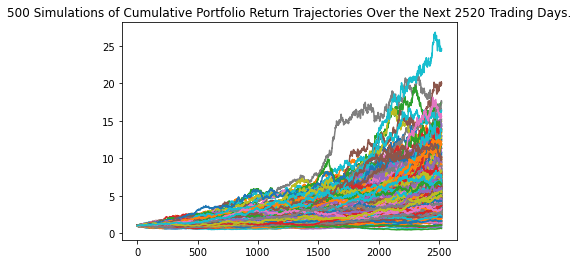

In [77]:
# Visualize the 10-year Monte Carlo simulation by creating an overlay line plot
MC_sim_line_plot = MC_ten_year.plot_simulation()

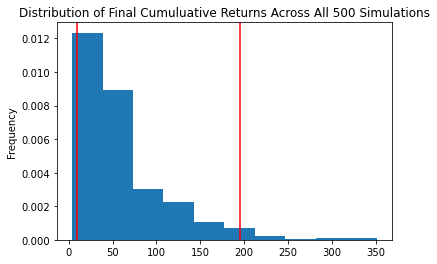

In [78]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation by plotting a histogram
MC_sim_dist_plot = MC_thirty_year.plot_distribution()

In [79]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
MC_ten_summary_statistics = MC_ten_year.summarize_cumulative_return()

# Review the 10-year Monte Carlo summary statistics
MC_ten_summary_statistics

count           500.000000
mean              5.542654
std               3.153983
min               0.651153
25%               3.328730
50%               4.880963
75%               6.988380
max              24.589170
95% CI Lower      1.575819
95% CI Upper     13.926720
Name: 2520, dtype: float64

In [75]:
# Print the current balance of the stock and bond portion of the members portfolio
print(new_sb_closing_prices_df)
stocks_bonds_value

In [88]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return = MC_ten_summary_statistics[8] * stocks_bonds_value
ci_upper_ten_cumulative_return = MC_ten_summary_statistics[9] * stocks_bonds_value

# Print the result of your calculations
print(ci_lower_ten_cumulative_return)
print(ci_upper_ten_cumulative_return)


117027.60362176524
1034262.2868910528
